# Import necessary libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

from tqdm import tqdm

# Prepare dataset

Files already downloaded and verified
Files already downloaded and verified


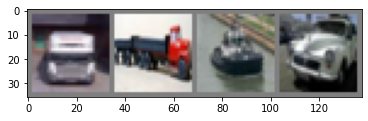

truck truck  ship   car


In [2]:
# normalize dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

trainset    = torchvision.datasets.CIFAR10(
    root="data", 
    train=True,
    download=True, 
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True, 
    num_workers=2
)

testset     = torchvision.datasets.CIFAR10(
    root="data", 
    train=False,
    download=True, 
    transform=transform
)
testloader  = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False, 
    num_workers=2
)

classes = (
    'plane', 
    'car', 
    'bird', 
    'cat',
    'deer', 
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck'
)

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

# Prepare model, loss function, and optimizer

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# train on GPU remember to send inputs and target to GPU @TODO: inputs, labels = data[0].to(device), data[1].to(device)
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Create model
net = Net()
# define loss function
criterion = nn.CrossEntropyLoss()
# define optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the model (network)

In [5]:
iteration = 20
for epoch in tqdm(range(iteration)):  # loop over the dataset multiple times
    print(f"Epoch number : {epoch}/{iteration}")
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch number : 0/20
[1,  2000] loss: 1.224
[1,  4000] loss: 1.212
[1,  6000] loss: 1.215
[1,  8000] loss: 1.204
[1, 10000] loss: 1.190
[1, 12000] loss: 1.180


  5%|▌         | 1/20 [00:32<10:11, 32.20s/it]

Epoch number : 1/20
[2,  2000] loss: 1.111
[2,  4000] loss: 1.120
[2,  6000] loss: 1.118
[2,  8000] loss: 1.106
[2, 10000] loss: 1.112
[2, 12000] loss: 1.123


 10%|█         | 2/20 [01:03<09:32, 31.83s/it]

Epoch number : 2/20
[3,  2000] loss: 1.044
[3,  4000] loss: 1.021
[3,  6000] loss: 1.023
[3,  8000] loss: 1.059
[3, 10000] loss: 1.040
[3, 12000] loss: 1.069


 15%|█▌        | 3/20 [01:35<08:57, 31.61s/it]

Epoch number : 3/20
[4,  2000] loss: 0.966
[4,  4000] loss: 0.985
[4,  6000] loss: 0.967
[4,  8000] loss: 0.995
[4, 10000] loss: 0.992
[4, 12000] loss: 1.001


 20%|██        | 4/20 [02:06<08:24, 31.55s/it]

Epoch number : 4/20
[5,  2000] loss: 0.918
[5,  4000] loss: 0.938
[5,  6000] loss: 0.922
[5,  8000] loss: 0.963
[5, 10000] loss: 0.965
[5, 12000] loss: 0.944


 25%|██▌       | 5/20 [02:39<07:58, 31.93s/it]

Epoch number : 5/20
[6,  2000] loss: 0.853
[6,  4000] loss: 0.890
[6,  6000] loss: 0.905
[6,  8000] loss: 0.914
[6, 10000] loss: 0.911
[6, 12000] loss: 0.905


 30%|███       | 6/20 [03:10<07:22, 31.63s/it]

Epoch number : 6/20
[7,  2000] loss: 0.813
[7,  4000] loss: 0.830
[7,  6000] loss: 0.850
[7,  8000] loss: 0.889
[7, 10000] loss: 0.867
[7, 12000] loss: 0.892


 35%|███▌      | 7/20 [03:40<06:46, 31.24s/it]

Epoch number : 7/20
[8,  2000] loss: 0.770
[8,  4000] loss: 0.815
[8,  6000] loss: 0.833
[8,  8000] loss: 0.826
[8, 10000] loss: 0.849
[8, 12000] loss: 0.866


 40%|████      | 8/20 [04:12<06:15, 31.33s/it]

Epoch number : 8/20
[9,  2000] loss: 0.756
[9,  4000] loss: 0.772
[9,  6000] loss: 0.812
[9,  8000] loss: 0.808
[9, 10000] loss: 0.819
[9, 12000] loss: 0.817


 45%|████▌     | 9/20 [04:42<05:41, 31.07s/it]

Epoch number : 9/20
[10,  2000] loss: 0.726
[10,  4000] loss: 0.737
[10,  6000] loss: 0.776
[10,  8000] loss: 0.801
[10, 10000] loss: 0.821
[10, 12000] loss: 0.808


 50%|█████     | 10/20 [05:13<05:10, 31.02s/it]

Epoch number : 10/20
[11,  2000] loss: 0.694
[11,  4000] loss: 0.741
[11,  6000] loss: 0.752
[11,  8000] loss: 0.774
[11, 10000] loss: 0.779
[11, 12000] loss: 0.812


 55%|█████▌    | 11/20 [05:44<04:38, 30.96s/it]

Epoch number : 11/20
[12,  2000] loss: 0.671
[12,  4000] loss: 0.721
[12,  6000] loss: 0.732
[12,  8000] loss: 0.741
[12, 10000] loss: 0.762
[12, 12000] loss: 0.762


 60%|██████    | 12/20 [06:14<04:06, 30.75s/it]

Epoch number : 12/20
[13,  2000] loss: 0.655
[13,  4000] loss: 0.716
[13,  6000] loss: 0.722
[13,  8000] loss: 0.746
[13, 10000] loss: 0.735
[13, 12000] loss: 0.760


 65%|██████▌   | 13/20 [06:45<03:34, 30.65s/it]

Epoch number : 13/20
[14,  2000] loss: 0.636
[14,  4000] loss: 0.663
[14,  6000] loss: 0.712
[14,  8000] loss: 0.738
[14, 10000] loss: 0.726
[14, 12000] loss: 0.757


 70%|███████   | 14/20 [07:16<03:04, 30.77s/it]

Epoch number : 14/20
[15,  2000] loss: 0.629
[15,  4000] loss: 0.659
[15,  6000] loss: 0.677
[15,  8000] loss: 0.717
[15, 10000] loss: 0.733
[15, 12000] loss: 0.727


 75%|███████▌  | 15/20 [07:46<02:33, 30.66s/it]

Epoch number : 15/20
[16,  2000] loss: 0.616
[16,  4000] loss: 0.655
[16,  6000] loss: 0.690
[16,  8000] loss: 0.684
[16, 10000] loss: 0.708
[16, 12000] loss: 0.748


 80%|████████  | 16/20 [08:17<02:02, 30.71s/it]

Epoch number : 16/20
[17,  2000] loss: 0.612
[17,  4000] loss: 0.626
[17,  6000] loss: 0.681
[17,  8000] loss: 0.686
[17, 10000] loss: 0.694
[17, 12000] loss: 0.729


 85%|████████▌ | 17/20 [08:48<01:32, 30.73s/it]

Epoch number : 17/20
[18,  2000] loss: 0.603
[18,  4000] loss: 0.621
[18,  6000] loss: 0.651
[18,  8000] loss: 0.660
[18, 10000] loss: 0.689
[18, 12000] loss: 0.708


 90%|█████████ | 18/20 [09:18<01:01, 30.68s/it]

Epoch number : 18/20
[19,  2000] loss: 0.588
[19,  4000] loss: 0.650
[19,  6000] loss: 0.638
[19,  8000] loss: 0.660
[19, 10000] loss: 0.680
[19, 12000] loss: 0.713


 95%|█████████▌| 19/20 [09:49<00:30, 30.64s/it]

Epoch number : 19/20
[20,  2000] loss: 0.557
[20,  4000] loss: 0.617
[20,  6000] loss: 0.658
[20,  8000] loss: 0.665
[20, 10000] loss: 0.700
[20, 12000] loss: 0.676


100%|██████████| 20/20 [10:19<00:00, 31.00s/it]

Finished Training


# Test the network on the test data

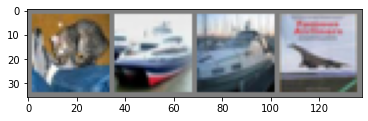

GroundTruth:    cat  ship  ship plane


In [6]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Evaluate for all test data

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

## Evaluate on each class of test data

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))